Obtaining list of characters from the Witcher Wiki

In [1]:
import time
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\chipmunk\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


In [3]:
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(page_url)

In [4]:
# the books
book_categories = driver.find_elements_by_class_name('category-page__member-link')

In [5]:
book_categories

[<selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="33fdea08-6b08-40b7-95e0-96b270025bfb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="8bd43831-6fb5-4033-91dc-2bee7d6736b1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="f6e668a6-3c72-4454-a8b7-d43e947d47f0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="6ea32bf6-c084-49b5-8e9c-2e1058d2da6b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="6946247c-834a-4cac-acdd-4786941efc3e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="f73e31e5-9c2b-49c0-aec2-72ee837fc63f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="70a48f8eaca13798a74e147c94c9951d", element="b65d8166-639d-4043-81fd-4c

In [6]:
# check the first one
book_categories[0].text

'Category:Baptism of Fire characters'

In [7]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [8]:
driver.get('https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters')

In [9]:
# this page has the list of characters for this book
character_elems = driver.find_elements_by_class_name('category-page__member-link')

In [10]:
character_elems[0].text

'Adalia'

In [11]:
# Loop over all the books and extract all the characters

# Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to webpage
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(page_url)
time.sleep(5) # allow delay for page to fully load

# uncomment the following line if there's a cookie accept requirement, this will click the button
## driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find Books
book_categories = driver.find_elements_by_class_name('category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, 'url': book_url})

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\chipmunk\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


In [12]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [13]:
# go into each book page and get character names
character_list = []
for book in books:
    driver.get(book['url'])
    character_elems = driver.find_elements_by_class_name('category-page__member-link')
    for elem in character_elems:
        character_list.append({'book': book['book_name'], 'character': elem.text})

In [14]:
character_df = pd.DataFrame(character_list)
character_df

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1269,Category:Time of Contempt characters,Yanna of Murivel
1270,Category:Time of Contempt characters,Yarpen Zigrin
1271,Category:Time of Contempt characters,Yennefer of Vengerberg
1272,Category:Time of Contempt characters,Yiolenta Suarez


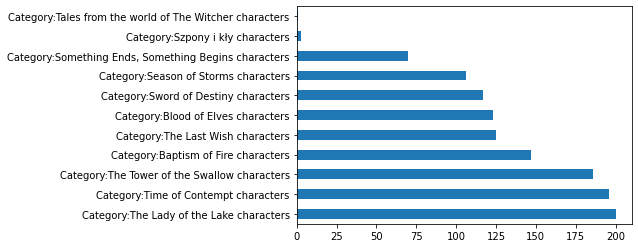

In [15]:
#some eda
# number of characters per book
character_df['book'].value_counts().plot(kind='barh')
plt.show()

In [16]:
# export to csv
character_df.to_csv('./data/witcher_characters.csv', index=False)